In [17]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
indir = 'G:\Shared drives\GEB Potential Study (NREL LBNL)\Measure Savings Shapes\Residential Measures\Run_2'

In [150]:
no_env_all = pd.read_csv(os.path.join(indir,'P2_DR_thermostat.csv'))
env_all = pd.read_csv(os.path.join(indir,'P3a_Best_envelope_thermostat_CAC_DR_thermostat.csv'))
env_base_all = pd.read_csv(os.path.join(indir, 'P1f_Best_envelope_thermostat_CAC.csv'))

def calc_ratio(df):
    df['ratio'] = df['Measure Load']/df['Baseline Load']
    return df

#Replace envelope baseline load with the post-EE shape
env_all['Baseline Load'] = env_base_all['Measure Load']
no_env_all = calc_ratio(no_env_all)
env_all = calc_ratio(env_all)
#env_base_all = calc_ratio(env_base_all)

In [409]:
cz = '7'
eu = 'heating'
season_start = 0#153
season_end = 91#244

In [410]:
no_env_all

Hour of Year Climate Zone  Net Load Version Building Type  End Use  \
0                  1           4B                 1      SFD Home  heating   
1                  2           4B                 1      SFD Home  heating   
2                  3           4B                 1      SFD Home  heating   
3                  4           4B                 1      SFD Home  heating   
4                  5           4B                 1      SFD Home  heating   
...              ...          ...               ...           ...      ...   
315355          8756           2B                 1      SFD Home  cooling   
315356          8757           2B                 1      SFD Home  cooling   
315357          8758           2B                 1      SFD Home  cooling   
315358          8759           2B                 1      SFD Home  cooling   
315359          8760           2B                 1      SFD Home  cooling   

        Baseline Load  Measure Load  Relative Savings     ratio  Hour of Day  
0            0.457942      0.460293      1.534256e-06  1.005135            1  
1            0.527281      0.528643      8.891164e-07  1.002584            2  
2            0.606166      0.606948      5.102543e-07  1.001290            3  
3            0.630910      0.631233      2.109139e-07  1.000512            4  
4            0.680891      0.680851     -2.640697e-08  0.999941            5  
...               ...           ...               ...       ...          ...  
315355       0.106504      0.035444     -1.349607e-05  0.332797           20  
315356       0.064293      0.141794      1.471950e-05  2.205455           21  
315357       0.039912      0.073516      6.382382e-06  1.841979           22  
315358       0.019305      0.031799      2.372799e-06  1.647142           23  
315359       0.005687      0.007812      4.036103e-07  1.373688           24  

[315360 rows x 10 columns]

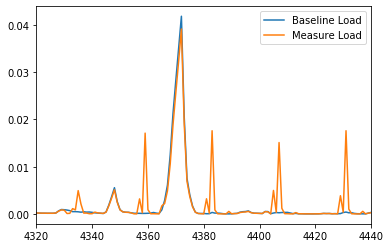

In [411]:
def select_cz(df):
    sel=((df['Climate Zone']==cz) &
         (df['End Use']==eu)&
         (df['Net Load Version']==1)
        )
    assert sel.sum()==8760, sel.sum()
    df['Hour of Day']=((df['Hour of Year']-1)%24+1).values
    return df.loc[sel].reset_index(drop=True)


no_env=select_cz(no_env_all)
env=select_cz(env_all)
#env_base=select_cz(env_base_all)


no_env.loc[24*180:24*185,['Baseline Load','Measure Load']].plot()


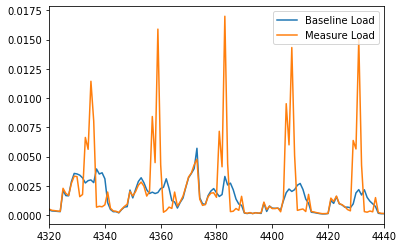

In [412]:
env.loc[24*180:24*185,['Baseline Load','Measure Load']].plot()

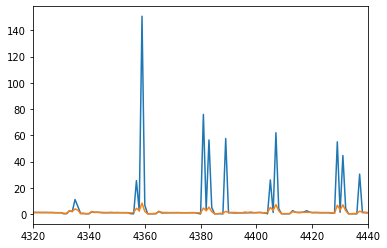

In [413]:
no_env.loc[24*180:24*185,'ratio'].plot()
env.loc[24*180:24*185,'ratio'].plot()

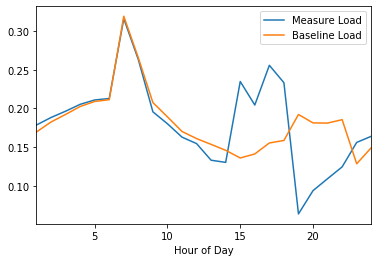

In [418]:
env_avg = env.loc[season_start*24:season_end*24].groupby('Hour of Day').agg({'Measure Load':np.mean,
                                   'Baseline Load':np.mean})
env_avg.plot()

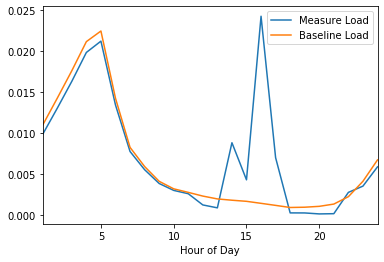

In [419]:
no_env_avg = no_env.loc[153*24:244*24].groupby('Hour of Day').agg({'Measure Load':np.mean,
                                   'Baseline Load':np.mean})
no_env_avg.plot()

In [420]:
env_avg['ratio'] = env_avg['Measure Load']/env_avg['Baseline Load']
no_env_avg['ratio'] = no_env_avg['Measure Load']/no_env_avg['Baseline Load']

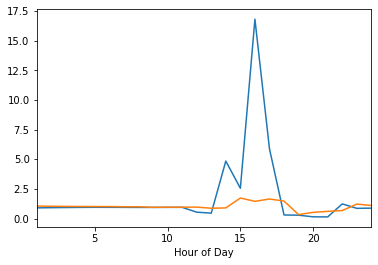

In [421]:
no_env_avg['ratio'].plot()
env_avg['ratio'].plot()

In [422]:
no_env_avg['ratio'].sum()/24

1.8803455183715625

In [423]:
env_avg['ratio'].sum()/24

1.0173805301753707

In [424]:
env_avg

Measure Load  Baseline Load     ratio
Hour of Day                                       
1                0.178675       0.169628  1.053333
2                0.188335       0.182545  1.031718
3                0.196475       0.192326  1.021573
4                0.205342       0.202552  1.013772
5                0.211016       0.209067  1.009322
6                0.212862       0.211336  1.007220
7                0.315984       0.319111  0.990200
8                0.263103       0.265318  0.991653
9                0.195646       0.207640  0.942235
10               0.180263       0.189178  0.952878
11               0.162993       0.170307  0.957053
12               0.154660       0.161141  0.959779
13               0.133186       0.153618  0.866993
14               0.130400       0.146017  0.893050
15               0.234844       0.136079  1.725798
16               0.204479       0.141298  1.447152
17               0.255764       0.155476  1.645046
18               0.233294       0.158709  1.469950
19               0.063858       0.192227  0.332202
20               0.093914       0.181391  0.517743
21               0.109370       0.181145  0.603771
22               0.124585       0.185557  0.671410
23               0.156179       0.128618  1.214286
24               0.164104       0.149322  1.098998

In [425]:
((env_avg['ratio']-1)/(no_env_avg['ratio']-1))[15:19].mean()

0.10515119269157946

In [426]:
results = {'2A': 1.151,
           '2B': 1.222,
           '3A': 1.087,
           '3B': 1.104,
           '3C': 0.978, #3C has an evening shed, so the comparison is not especially apt.
           '4B': 1.189,
           '4C': 1.034,
           '5A': 1.088,
           '5B': 0.944,
           '6A': 1.017,
           '7': 0.977
          }